# VotingClassifier

**After running the GradientBoosting, Random Forest, SVC models and then getting the<br> features importance for each of the models,
we then run the Voting Classifier model only using<br> only the common features between at least two of the three models**
~~~javascript



best_x_between_models=['PageValues_skew_s', 'TrafficType_dummies_8',
        'Region_dummies_2','season_dummies_Spring',
        'OperatingSystems_dummies_2', 'Region_dummies_1',
       'Weekend_binary','TrafficType_dummies_2',
        'average_informational_duration_skew_s','average_ProductRelated_duration_skew_s', 
        'average_administrative_duration_skew_s','average_BounceRates/ExitRates_skew_s',
        'season_dummies_Fall']




                                     
GradientBoosting_best_features = ['Browser_dummies_2', 'TrafficType_dummies_8', 
                    'Region_dummies_2', 'season_dummies_Spring',
                    'OperatingSystems_dummies_2', 'Region_dummies_3',
                    'Weekend_binary', 'Region_dummies_1',
       'TrafficType_dummies_2', 'average_informational_duration_skew_s',
                    'average_ProductRelated_duration_skew_s', 
                    'average_administrative_duration_skew_s',
                    'average_BounceRates/ExitRates_skew_s',
       'season_dummies_Fall', 'PageValues_skew_s']                      

RandomForest_best_features = ['Region_dummies_1', 'TrafficType_dummies_11',
       'season_dummies_winter', 'Weekend_binary',
       'VisitorType_dummies_New_Visitor','VisitorType_dummies_Returning_Visitor',
       'OperatingSystems_dummies_2', 'TrafficType_dummies_3', 
       'average_informational_duration_skew_s',
       'OperatingSystems_dummies_3', 'season_dummies_Spring',
       'TrafficType_dummies_2', 'season_dummies_Fall',
       'average_ProductRelated_duration_skew_s', 
        'average_administrative_duration_skew_s',
       'average_BounceRates/ExitRates_skew_s', 'PageValues_skew_s']



SVC_best_features = ['Region_dummies_2', 'Browser_dummies_1',
                     'Browser_dummies_8', 'Browser_dummies_12',
                     'season_dummies_winter', 'Browser_dummies_13', 
                     'season_dummies_summer', 'season_dummies_Fall',
       'OperatingSystems_dummies_7', 'TrafficType_dummies_13', 
                     'TrafficType_dummies_9', 'TrafficType_dummies_14',
                     'TrafficType_dummies_7', 'TrafficType_dummies_6',
                     'TrafficType_dummies_20',
       'TrafficType_dummies_1', 'TrafficType_dummies_4',
                     'TrafficType_dummies_3', 'TrafficType_dummies_5', 
                     'TrafficType_dummies_10', 'TrafficType_dummies_11',
                     'TrafficType_dummies_2',
       'TrafficType_dummies_8', 'TrafficType_dummies_16', 'PageValues_skew_s']


~~~

In [1]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
import pandas as pd
import numpy as np

from sklearn import model_selection
from sklearn.model_selection import cross_val_score

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.metrics import f1_score






from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

plt.style.use('seaborn')
pd.set_option('display.width', 200)
pd.set_option('display.max_colwidth', 20)
pd.set_option('display.max_rows', 100)
from IPython.display import display, Markdown, Latex
from sklearn.ensemble import ExtraTreesClassifier


In [3]:
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score

from imblearn.datasets import fetch_datasets
from imblearn.ensemble import BalancedBaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import RUSBoostClassifier

from imblearn.metrics import geometric_mean_score
from imblearn.under_sampling import NearMiss 




#reading the data
from scaled_data import *
X,y = clean_data()


best_features_spsa = [  'Weekend_binary','Region_dummies_3', 'Region_dummies_1','VisitorType_dummies_New_Visitor', 
        'average_informational_duration_skew_s', 'average_ProductRelated_duration_skew_s',
                      'average_administrative_duration_skew_s',
                      'average_BounceRates/ExitRates_skew_s',
       'season_dummies_Fall', 'PageValues_skew_s']
X=X[best_features_spsa]
VC_Xdata = X.copy() #making our X columns


#getting the values of our x features:

XVC_model = VC_Xdata.values

#getting the values of our y:
y_VC_model = y.values.ravel() # target


from sklearn.model_selection import train_test_split

#Splitting data test&train 
X_train, X_test, y_train, y_test= train_test_split(XVC_model, y_VC_model , test_size=0.25, random_state=8)

from imblearn.over_sampling import SMOTE

sm =SMOTE(k_neighbors=4,random_state=123)
X_train_bal, y_train_bal = sm.fit_sample(X_train, y_train)




clf1 = GradientBoostingClassifier(learning_rate=0.05,n_estimators=1250,max_depth=4, min_samples_split=10,
                                       min_samples_leaf=1, subsample=0.8 , random_state=123,
                                      )




                                     
GB_best_features = ['Browser_dummies_2', 'TrafficType_dummies_8', 
                    'Region_dummies_2', 'season_dummies_Spring',
                    'OperatingSystems_dummies_2', 'Region_dummies_3',
                    'Weekend_binary', 'Region_dummies_1',
       'TrafficType_dummies_2', 'average_informational_duration_skew_s',
                    'average_ProductRelated_duration_skew_s', 
                    'average_administrative_duration_skew_s',
                    'average_BounceRates/ExitRates_skew_s',
       'season_dummies_Fall', 'PageValues_skew_s']                      


clf2 =BalancedRandomForestClassifier(max_depth =  7 , 
                                  min_samples_split = 6,
                                  min_samples_leaf =1  , 
                                  n_estimators = 1750 ,
                                  random_state=123)
                                     #,n_jobs=-1)


RF_best_features = ['Region_dummies_1', 'TrafficType_dummies_11',
                    'season_dummies_winter', 'Weekend_binary',
       'VisitorType_dummies_New_Visitor',
                    'VisitorType_dummies_Returning_Visitor',
                    'OperatingSystems_dummies_2', 'TrafficType_dummies_3', 
                    'average_informational_duration_skew_s',
       'OperatingSystems_dummies_3', 'season_dummies_Spring',
                    'TrafficType_dummies_2', 'season_dummies_Fall',
                    'average_ProductRelated_duration_skew_s', 
                    'average_administrative_duration_skew_s',
       'average_BounceRates/ExitRates_skew_s', 'PageValues_skew_s']

clf3 = SVC(C=1, break_ties=False, cache_size=200,
           class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3,
           gamma=1, kernel='linear',
    max_iter=-1, probability=True, random_state=123,
           shrinking=True, tol=0.001,
           verbose=False)



SVC_best_features = ['Region_dummies_2', 'Browser_dummies_1',
                     'Browser_dummies_8', 'Browser_dummies_12',
                     'season_dummies_winter', 'Browser_dummies_13', 
                     'season_dummies_summer', 'season_dummies_Fall',
       'OperatingSystems_dummies_7', 'TrafficType_dummies_13', 
                     'TrafficType_dummies_9', 'TrafficType_dummies_14',
                     'TrafficType_dummies_7', 'TrafficType_dummies_6',
                     'TrafficType_dummies_20',
       'TrafficType_dummies_1', 'TrafficType_dummies_4',
                     'TrafficType_dummies_3', 'TrafficType_dummies_5', 
                     'TrafficType_dummies_10', 'TrafficType_dummies_11',
                     'TrafficType_dummies_2',
       'TrafficType_dummies_8', 'TrafficType_dummies_16', 'PageValues_skew_s']

eclf = VotingClassifier(estimators=[('gb', clf1), ('rf', clf2), ("SVC", clf3) ],voting='soft')





eclf.fit(X_train_bal,y_train_bal)

eclf_train_pred= eclf.predict(X_train_bal)

eclf_test_pred = eclf.predict(X_test)

print(eclf.estimators)



[('gb', GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=1250,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=123, subsample=0.8, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)), ('rf', BalancedRandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                               criterion='gini', max_depth=7,
                               max_features='auto', max_leaf_nodes=None,
                               max_samples=None, min_impurity_decrea

Training Metrics
Accuracy: 0.8715308863025962
Precision: 0.8884728537041989
Recall: 0.8497250287760583
F1: 0.8714697707669472
Roc -Auc Curve 0.8715308863025962
Test Metrics
Accuracy: 0.8709049626986701
Precision: 0.5611940298507463
Recall: 0.7833333333333333
F1: 0.8791243535782312
Roc -Auc Curve 0.8351933666282494
Test Classification Report
              precision    recall  f1-score   support

           0       0.96      0.89      0.92      2603
           1       0.56      0.78      0.65       480

    accuracy                           0.87      3083
   macro avg       0.76      0.84      0.79      3083
weighted avg       0.90      0.87      0.88      3083



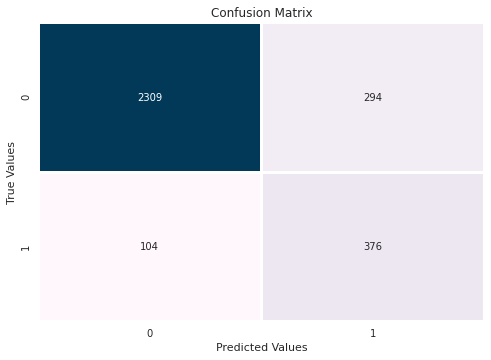

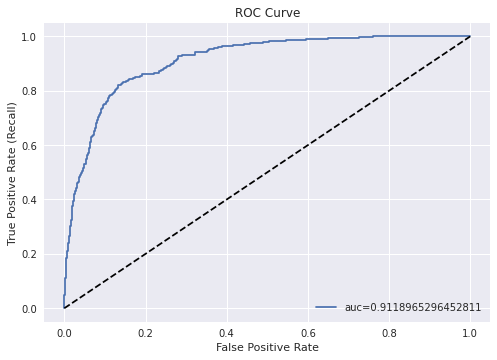

In [4]:
from sklearn.metrics import accuracy_score,precision_score,recall_score ,roc_auc_score ,roc_curve, auc , precision_recall_fscore_support


print("Training Metrics")
print("Accuracy:",accuracy_score(y_train_bal,eclf_train_pred))
print("Precision:",precision_score(y_train_bal,eclf_train_pred))
print("Recall:",recall_score(y_train_bal,eclf_train_pred))
print("F1:",f1_score(y_train_bal,eclf_train_pred, average='weighted'))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_bal,eclf_train_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('Roc -Auc Curve',roc_auc)

print("Test Metrics")
print("Accuracy:",accuracy_score(y_test,eclf_test_pred))
print("Precision:",precision_score(y_test,eclf_test_pred))
print("Recall:",recall_score(y_test,eclf_test_pred))
print("F1:",f1_score(y_test,eclf_test_pred, average='weighted'))
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,eclf_test_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

print('Roc -Auc Curve',roc_auc)

from sklearn.metrics import classification_report
print('Test Classification Report')
print(classification_report(y_test,eclf_test_pred))




from sklearn.metrics import roc_curve, auc

confusion_matrix = metrics.confusion_matrix(y_test, eclf_test_pred)


sns.heatmap(confusion_matrix, annot=True,cmap = "PuBu"  ,fmt="d",lw = 2,
                cbar=False)

plt.ylabel("True Values")
plt.xlabel("Predicted Values")
plt.title("Confusion Matrix")
plt.show()


y_pred_proba = eclf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve')
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.show()



In [16]:
rkf = RepeatedKFold(n_splits=5, n_repeats=5, random_state=123)



for clf, label in zip([clf1, clf2, clf3, eclf], ['GradientBoosting', 'Random Forest', 'SVC', 'Ensemble']):
    fscores = cross_val_score(clf, X_train_bal, y_train_bal, scoring='f1', cv=5)
    
    scores = cross_val_score(clf,  X_train_bal, y_train_bal, scoring='roc_auc', cv=5)
   
    
    print("[%s] model bias bias (f1-score) %0.5f (variance %0.5f)" % (label,fscores.mean(), fscores.std()))
    print("[%s] model bias bias (AUC-score) %0.5f (variance %0.5f)" % (label,scores.mean(), scores.std()))


[GradientBoosting] model bias bias (f1-score) 0.88422 (variance 0.01582)
[GradientBoosting] model bias bias (AUC-score) 0.94605 (variance 0.00955)
[Random Forest] model bias bias (f1-score) 0.86519 (variance 0.00597)
[Random Forest] model bias bias (AUC-score) 0.94225 (variance 0.00641)
[SVC] model bias bias (f1-score) 0.84421 (variance 0.00499)
[SVC] model bias bias (AUC-score) 0.90940 (variance 0.00436)
[Ensemble] model bias bias (f1-score) 0.86162 (variance 0.00708)
[Ensemble] model bias bias (AUC-score) 0.94461 (variance 0.00746)
